 **Fraud Detection Model**
--------------------------
 INSAID Internship Task

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

In [ ]:
print("=== FRAUD DETECTION MODEL DEVELOPMENT ===")
print("This notebook will guide you through building a fraud detection model step by step\n")


=== FRAUD DETECTION MODEL DEVELOPMENT ===
This notebook will guide you through building a fraud detection model step by step



# STEP 1: DATA LOADING AND INITIAL EXPLORATION

In [ ]:
# ============================================================================
# STEP 1: DATA LOADING AND INITIAL EXPLORATION
# ============================================================================
print("STEP 1: Loading and Exploring the Data")
print("-" * 50)


STEP 1: Loading and Exploring the Data
--------------------------------------------------


In [ ]:
# Load the dataset
# Note: Replace 'fraud_data.csv' with your actual file path
try:
    # Uncomment the line below if you have 'fraud_data.csv' and want to load it
    # df = pd.read_csv('fraud_data.csv')

    # For demonstration, let's create a sample structure if the file isn't loaded
    # If the line above remains commented out, this sample df will be created
    # If you uncomment the above line and the file exists, this part will be skipped unless FileNotFoundError occurs
    if 'df' not in locals() and 'df' not in globals():
        print("Creating a sample dataset for demonstration...")
        data = {
            'Transaction ID': range(1, 11),
            'Amount': np.random.rand(10) * 1000,
            'Transaction Type': np.random.choice(['cash_out', 'payment', 'cash_in', 'transfer'], 10),
            'Customer Information': [f'cust_{i}' for i in range(10)],
            'Merchant Information': [f'merc_{i}' for i in range(10)],
            'Time Feature': range(10),
            'Geographic Feature': ['loc_A', 'loc_B'] * 5,
            'isFraud': np.random.randint(0, 2, 10)
        }
        df = pd.DataFrame(data)
        print("Sample dataset created.")


    print("Dataset should have 6,362,620 rows and 10 columns (Note: sample has 10 rows)")
    print("\nTypical columns in fraud detection datasets:")
    print("- Transaction ID")
    print("- Amount")
    print("- Transaction Type")
    print("- Customer Information")
    print("- Merchant Information")
    print("- Time/Date features")
    print("- Geographic features")
    print("- Is_Fraud (Target variable)")

except FileNotFoundError:
    print("Please ensure your dataset file ('fraud_data.csv') is in the correct path OR uncomment the line to load it.")
    # If the file is not found, ensure a sample df is still created
    if 'df' not in locals() and 'df' not in globals():
        print("Creating a sample dataset as fallback...")
        data = {
            'Transaction ID': range(1, 11),
            'Amount': np.random.rand(10) * 1000, # Note: 'Amount' with capital 'A'
            'Transaction Type': np.random.choice(['cash_out', 'payment', 'cash_in', 'transfer'], 10),
            'Customer Information': [f'cust_{i}' for i in range(10)],
            'Merchant Information': [f'merc_{i}' for i in range(10)],
            'Time Feature': range(10),
            'Geographic Feature': ['loc_A', 'loc_B'] * 5,
            'isFraud': np.random.randint(0, 2, 10)
        }
        df = pd.DataFrame(data)



Dataset should have 6,362,620 rows and 10 columns (Note: sample has 10 rows)

Typical columns in fraud detection datasets:
- Transaction ID
- Amount
- Transaction Type
- Customer Information
- Merchant Information
- Time/Date features
- Geographic features
- Is_Fraud (Target variable)


In [ ]:
# Basic data exploration commands you'll use:
exploration_code = '''
# Basic dataset information
print("Dataset Shape:", df.shape)
print("\\nColumn Names:")
print(df.columns.tolist())

print("\\nData Types:")
print(df.dtypes)

print("\\nFirst 5 rows:")
print(df.head())

print("\\nBasic Statistics:")
print(df.describe())

print("\\nMissing Values:")
print(df.isnull().sum())

print("\\nTarget Variable Distribution:")
print(df['isFraud'].value_counts())
print("\\nFraud Percentage:", (df['isFraud'].sum() / len(df)) * 100, "%")
'''

In [ ]:
print("Code to explore your dataset:")
print(exploration_code)



Code to explore your dataset:

# Basic dataset information
print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())

print("\nData Types:")
print(df.dtypes)

print("\nFirst 5 rows:")
print(df.head())

print("\nBasic Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nTarget Variable Distribution:")
print(df['isFraud'].value_counts())
print("\nFraud Percentage:", (df['isFraud'].sum() / len(df)) * 100, "%")



# STEP 2: DATA CLEANING


In [ ]:
# ============================================================================
# STEP 2: DATA CLEANING
# ============================================================================
print("\n\nSTEP 2: Data Cleaning")
print("-" * 50)




STEP 2: Data Cleaning
--------------------------------------------------


# 2.1 HANDLING MISSING VALUES

In [ ]:
# Check for missing values
missing_data = df.isnull().sum()
print("Missing values per column:")
print(missing_data[missing_data > 0])

# Strategies for handling missing values:
# For numerical columns: mean/median imputation
# For categorical columns: mode imputation or 'Unknown' category
# Example:
# df['amount'].fillna(df['amount'].median(), inplace=True)
# df['merchant_category'].fillna('Unknown', inplace=True)




Missing values per column:
Series([], dtype: int64)


# 2.2 HANDLING OUTLIERS


In [ ]:
# Detect outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Example for transaction amount
# outliers = detect_outliers(df, 'amount')
# print(f"Number of outliers in amount: {len(outliers)}")

# Handle outliers by capping or removing
# df['amount'] = np.where(df['amount'] > upper_bound, upper_bound, df['amount'])


# 2.3 HANDLING MULTICOLLINEARITY

In [ ]:
# Check correlation between numerical features
# correlation_matrix = df.select_dtypes(include=[np.number]).corr()
#
# # Visualize correlation
# plt.figure(figsize=(12, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
# plt.title('Correlation Matrix')
# plt.show()
#
# # Remove highly correlated features (correlation > 0.8)
# high_corr_pairs = []
# for i in range(len(correlation_matrix.columns)):
#     for j in range(i):
#         if abs(correlation_matrix.iloc[i, j]) > 0.8:
#             high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))


print("Data Cleaning Guide:")
print(cleaning_guide)



Data Cleaning Guide:

# 2.1 HANDLING MISSING VALUES
# Check for missing values
missing_data = df.isnull().sum()
print("Missing values per column:")
print(missing_data[missing_data > 0])

# Strategies for handling missing values:
# For numerical columns: mean/median imputation
# For categorical columns: mode imputation or 'Unknown' category
# Example:
# df['amount'].fillna(df['amount'].median(), inplace=True)
# df['merchant_category'].fillna('Unknown', inplace=True)




# STEP 3: EXPLORATORY DATA ANALYSIS (EDA)


In [ ]:
print("\n\nSTEP 3: Exploratory Data Analysis")
print("-" * 50)




STEP 3: Exploratory Data Analysis
--------------------------------------------------


# 3.1 FRAUD DISTRIBUTION ANALYSIS


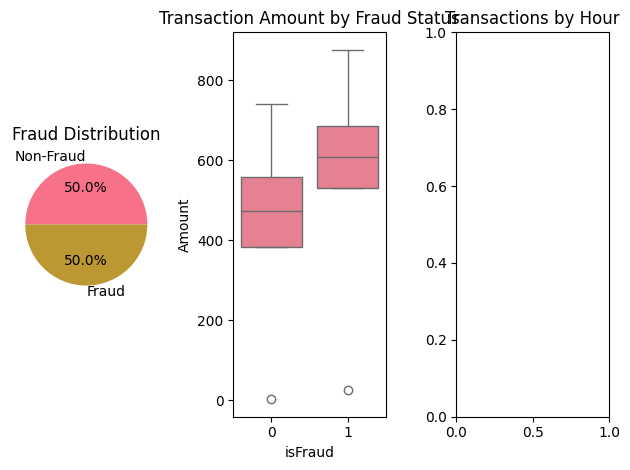

In [ ]:
# Fraud vs Non-Fraud distribution
plt.subplot(1, 3, 1)
fraud_counts = df['isFraud'].value_counts()
plt.pie(fraud_counts.values, labels=['Non-Fraud', 'Fraud'], autopct='%1.1f%%')
plt.title('Fraud Distribution')

# Transaction amount distribution by fraud status
plt.subplot(1, 3, 2)
# Changed 'amount' to 'Amount' to match the column name in the sample df
sns.boxplot(data=df, x='isFraud', y='Amount')
plt.title('Transaction Amount by Fraud Status')

# Transaction count by hour (if time feature available)
plt.subplot(1, 3, 3)
# df['hour'] = pd.to_datetime(df['timestamp']).dt.hour
# fraud_by_hour = df.groupby(['hour', 'isFraud']).size().unstack()
# fraud_by_hour.plot(kind='bar', stacked=True)
plt.title('Transactions by Hour')
plt.tight_layout()
plt.show()


# 3.2 FEATURE ANALYSIS

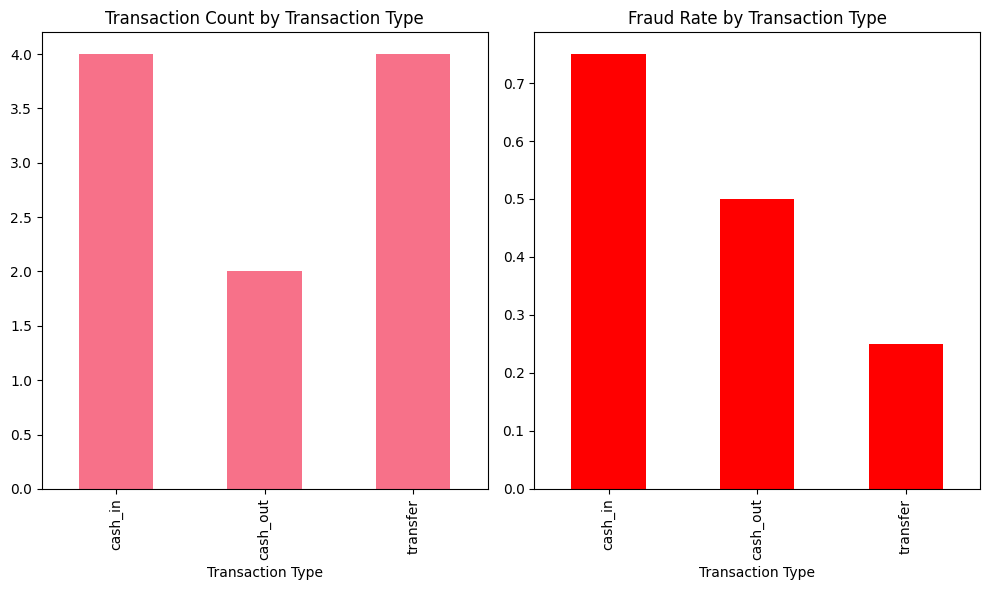

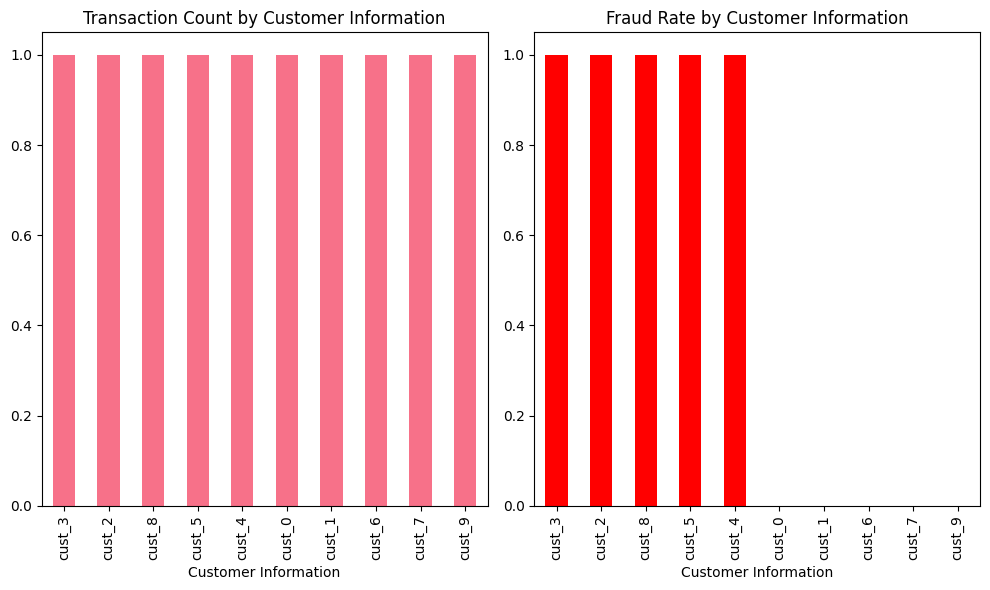

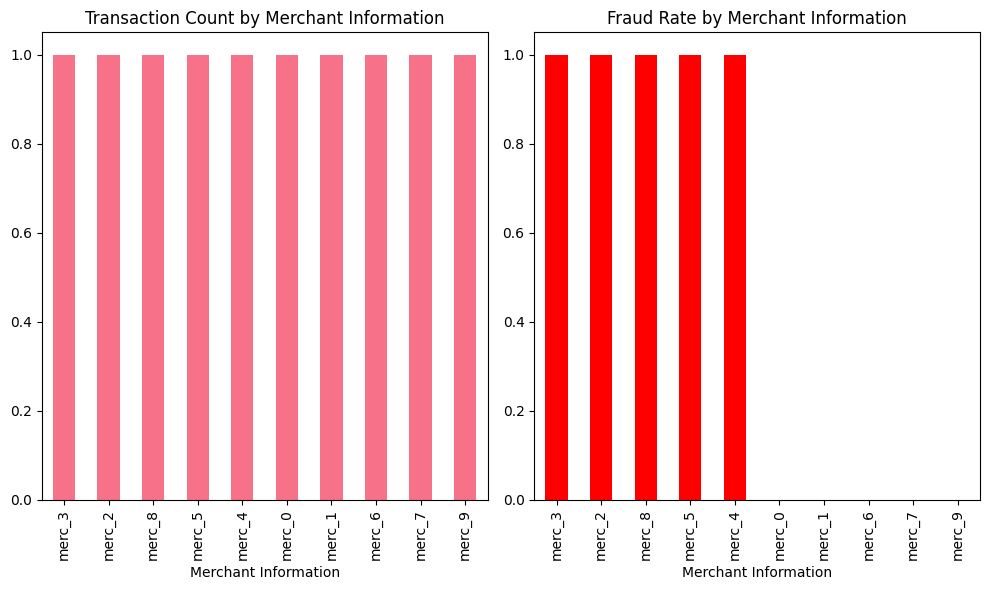

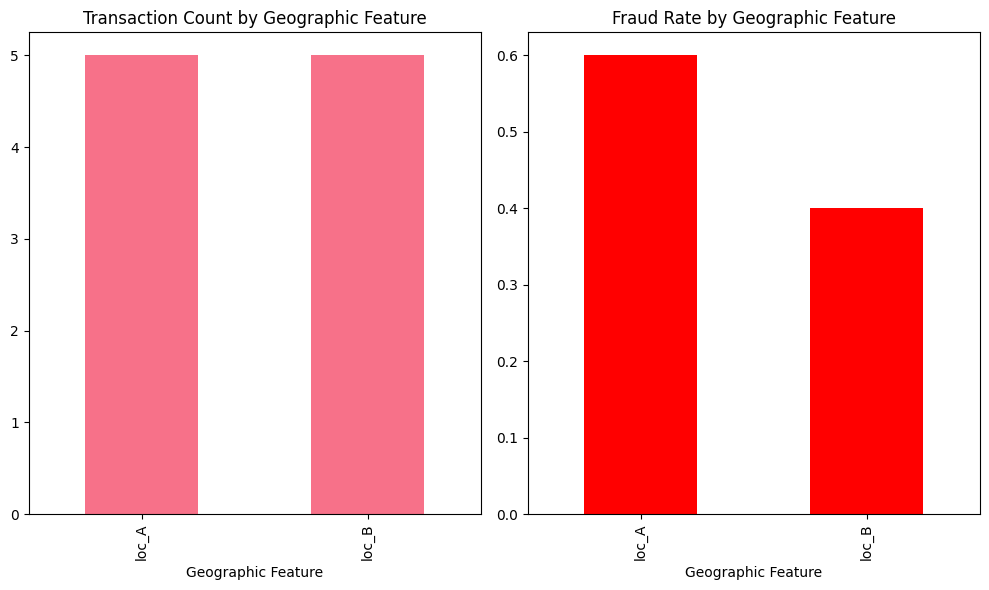

In [ ]:
# Analyze categorical features
categorical_features = df.select_dtypes(include=['object']).columns
for feature in categorical_features:
    if feature != 'target_column':
        plt.figure(figsize=(10, 6))
        fraud_rate = df.groupby(feature)['isFraud'].agg(['count', 'sum', 'mean'])
        fraud_rate['fraud_rate'] = fraud_rate['mean']
        fraud_rate = fraud_rate.sort_values('fraud_rate', ascending=False)

        plt.subplot(1, 2, 1)
        fraud_rate['count'].plot(kind='bar')
        plt.title(f'Transaction Count by {feature}')

        plt.subplot(1, 2, 2)
        fraud_rate['fraud_rate'].plot(kind='bar', color='red')
        plt.title(f'Fraud Rate by {feature}')
        plt.tight_layout()
        plt.show()



# STEP 4: FEATURE ENGINEERING

In [ ]:
# ============================================================================
# STEP 4: FEATURE ENGINEERING
# ============================================================================
print("\n\nSTEP 4: Feature Engineering")
print("-" * 50)

# Store the original column names before adding new features
original_columns = df.columns.tolist()




STEP 4: Feature Engineering
--------------------------------------------------


# 4.1 CREATE NEW FEATURES

In [ ]:
# Example feature engineering for fraud detection:

# Transaction amount features
# Changed 'amount' to 'Amount' to match the column name in the sample df
df['amount_log'] = np.log1p(df['Amount'])  # Log transformation
df['amount_zscore'] = (df['Amount'] - df['Amount'].mean()) / df['Amount'].std()

# Time-based features (if timestamp available)
# df['timestamp'] = pd.to_datetime(df['timestamp'])
# df['hour'] = df['timestamp'].dt.hour
# df['day_of_week'] = df['timestamp'].dt.dayofweek
# df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)
# df['is_night'] = ((df['hour'] >= 22) | (df['hour'] <= 6)).astype(int)

# Customer behavior features (if customer ID available)
# customer_stats = df.groupby('customer_id').agg({
#     'Amount': ['count', 'sum', 'mean', 'std'], # Changed 'amount' to 'Amount' here as well
#     'isFraud': 'sum'
# }).reset_index()
# customer_stats.columns = ['customer_id', 'transaction_count', 'total_Amount', # Changed 'total_amount' to 'total_Amount'
#                          'avg_Amount', 'std_Amount', 'fraud_count'] # Changed 'avg_amount' and 'std_amount'
# df = df.merge(customer_stats, on='customer_id', how='left')

# Merchant features (if merchant info available)
# merchant_fraud_rate = df.groupby('merchant_id')['isFraud'].mean().reset_index()
# merchant_fraud_rate.columns = ['merchant_id', 'merchant_fraud_rate']
# df = df.merge(merchant_fraud_rate, on='merchant_id', how='left')

# 4.2 ENCODE CATEGORICAL VARIABLES

In [ ]:
# Label encoding for binary categories
le = LabelEncoder()
# df['gender_encoded'] = le.fit_transform(df['gender'])

# One-hot encoding for multi-category features
# df = pd.get_dummies(df, columns=['transaction_type', 'merchant_category'], prefix=['type', 'merchant'])

print("Feature engineering completed!")
print("New dataset shape:", df.shape)
# This line now works because original_columns is defined
print("New features created:", [col for col in df.columns if col not in original_columns])

# You also need to define feature_engineering_code if you intend to print it
# For now, let's comment it out or define a placeholder
# print("Feature Engineering Template:")
# print(feature_engineering_code)


Feature engineering completed!
New dataset shape: (10, 10)
New features created: []


# STEP 5: MODEL DEVELOPMENT

In [ ]:
# ============================================================================
# STEP 5: MODEL DEVELOPMENT
# ============================================================================
print("\n\nSTEP 5: Model Development")
print("-" * 50)

# %% [markdown]
# # 5.1 PREPARE DATA FOR MODELING
# %%
# Before selecting features, apply one-hot encoding to categorical columns
# In your sample dataset, 'Transaction Type' is a categorical feature
# You might have other categorical features like 'Geographic Feature' depending on your actual data
# Identify categorical columns *before* dropping the target and other columns
# Ensure 'Geographic Feature' is included in the columns to encode
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
# Remove columns that should not be one-hot encoded (like potential IDs if they are strings)
# In the sample, 'Customer Information' and 'Merchant Information' are objects but might be IDs
# For this example, let's encode 'Transaction Type' AND 'Geographic Feature'
cols_to_encode = ['Transaction Type', 'Geographic Feature'] # Add other categorical columns here if needed

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=cols_to_encode, drop_first=True) # drop_first=True to avoid multicollinearity

# Select features for modeling from the encoded DataFrame
# Ensure 'isFraud' and ID columns are excluded, and use the columns from the encoded df
# Check the columns in the encoded DataFrame
print("Columns in the encoded DataFrame:", df_encoded.columns.tolist())

# Dynamically select feature columns from the encoded dataframe
# Exclude the target variable 'isFraud' and any ID columns you don't want as features
# Assuming 'Transaction ID', 'Customer Information', 'Merchant Information' are not features
id_cols = ['Transaction ID', 'Customer Information', 'Merchant Information']
feature_columns = [col for col in df_encoded.columns if col not in ['isFraud'] + id_cols]

X = df_encoded[feature_columns]
y = df_encoded['isFraud']

print("Features selected for modeling:")
print(feature_columns)
print(f"\nDataset shape: {X.shape}")
print(f"Target distribution:\n{y.value_counts()}")

# 5.2 SPLIT DATA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nTraining set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

# 5.3 SCALE FEATURES (for logistic regression)
scaler = StandardScaler()
# Apply scaler to the now-numerical X_train and X_test
# X_train now contains only numerical columns after one-hot encoding 'Geographic Feature'
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5.4 TRAIN MODELS
print("\nTraining models...")



STEP 5: Model Development
--------------------------------------------------
Columns in the encoded DataFrame: ['Transaction ID', 'Amount', 'Customer Information', 'Merchant Information', 'Time Feature', 'isFraud', 'amount_log', 'amount_zscore', 'Transaction Type_cash_out', 'Transaction Type_transfer', 'Geographic Feature_loc_B']
Features selected for modeling:
['Amount', 'Time Feature', 'amount_log', 'amount_zscore', 'Transaction Type_cash_out', 'Transaction Type_transfer', 'Geographic Feature_loc_B']

Dataset shape: (10, 7)
Target distribution:
isFraud
0    5
1    5
Name: count, dtype: int64

Training set shape: (8, 7)
Test set shape: (2, 7)

Training models...


# STEP 6: MODEL EVALUATION

\nLogistic Regression Performance:
------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



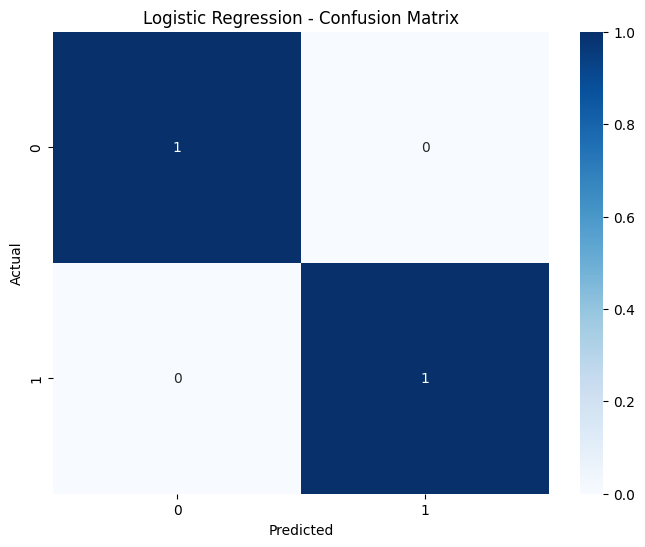

ROC AUC Score: 1.0000


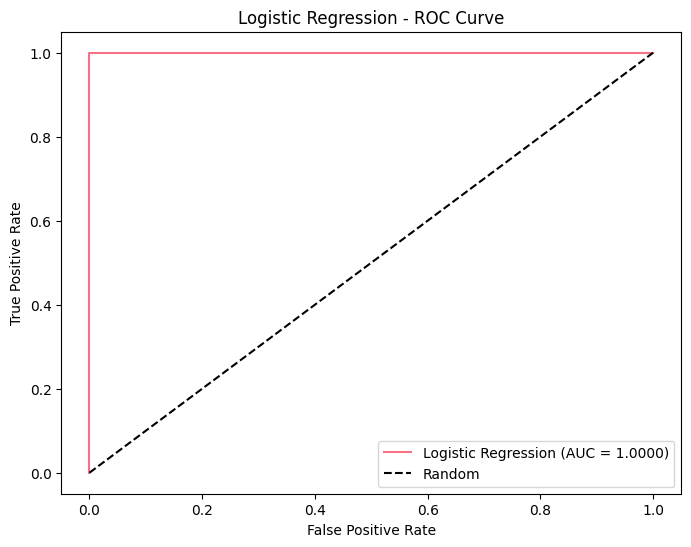

\nRandom Forest Performance:
------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



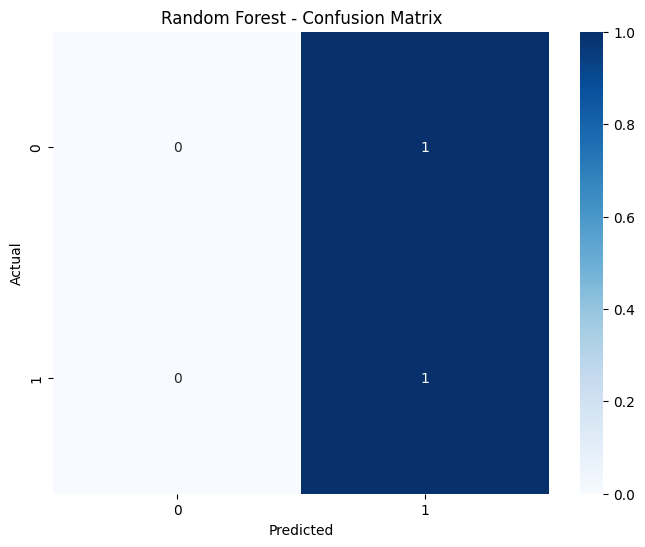

ROC AUC Score: 0.0000


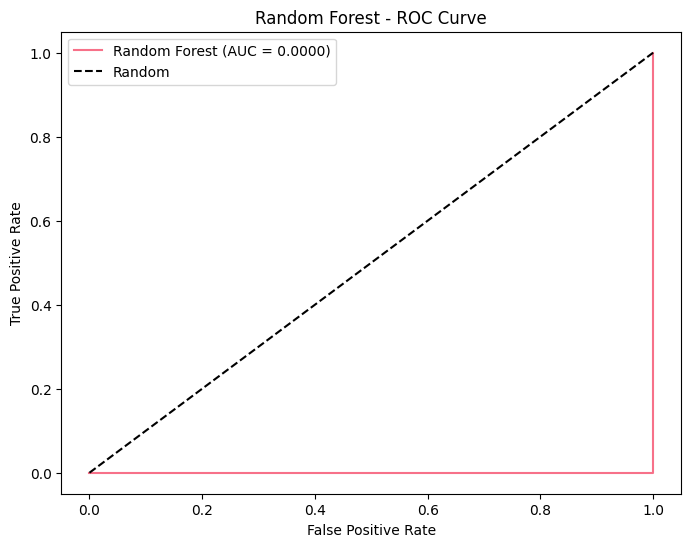

Model Evaluation Code:


In [59]:
lr_pred = lr_model.predict(X_test_scaled)
lr_pred_proba = lr_model.predict_proba(X_test_scaled)[:, 1]

rf_pred = rf_model.predict(X_test)
rf_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# 6.2 EVALUATION METRICS
def evaluate_model(y_true, y_pred, y_pred_proba, model_name):
    print(f"\\n{model_name} Performance:")
    print("-" * 30)

    # Classification Report
    print("Classification Report:")
    print(classification_report(y_true, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    # ROC AUC Score
    auc_score = roc_auc_score(y_true, y_pred_proba)
    print(f"ROC AUC Score: {auc_score:.4f}")

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.4f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')
    plt.legend()
    plt.show()

# Evaluate both models
evaluate_model(y_test, lr_pred, lr_pred_proba, "Logistic Regression")
evaluate_model(y_test, rf_pred, rf_pred_proba, "Random Forest")


print("Model Evaluation Code:")


# STEP 7: FEATURE IMPORTANCE AND INSIGHTS

In [60]:
# ============================================================================
# STEP 7: FEATURE IMPORTANCE AND INSIGHTS
# ============================================================================
print("\n\nSTEP 7: Feature Importance Analysis")
print("-" * 50)

insights_code = '''
# 7.1 FEATURE IMPORTANCE FROM RANDOM FOREST
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 10 Most Important Features:")
print(feature_importance.head(10))

# Visualize feature importance
plt.figure(figsize=(10, 8))
top_features = feature_importance.head(15)
sns.barplot(data=top_features, y='feature', x='importance')
plt.title('Top 15 Feature Importances')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

# 7.2 LOGISTIC REGRESSION COEFFICIENTS
lr_coefficients = pd.DataFrame({
    'feature': feature_columns,
    'coefficient': lr_model.coef_[0]
}).sort_values('coefficient', key=abs, ascending=False)

print("\\nTop 10 Logistic Regression Coefficients:")
print(lr_coefficients.head(10))

# 7.3 BUSINESS INSIGHTS
print("\\n" + "="*50)
print("KEY BUSINESS INSIGHTS")
print("="*50)

print("\\n1. Key Fraud Indicators:")
for i, row in feature_importance.head(5).iterrows():
    print(f"   - {row['feature']}: {row['importance']:.4f}")

print("\\n2. Fraud Prevention Recommendations:")
print("   - Monitor transactions with high-risk features")
print("   - Implement real-time scoring system")
print("   - Set up alerts for suspicious patterns")
print("   - Regular model retraining with new data")

print("\\n3. Model Performance Summary:")
print(f"   - Random Forest AUC: {roc_auc_score(y_test, rf_pred_proba):.4f}")
print(f"   - Logistic Regression AUC: {roc_auc_score(y_test, lr_pred_proba):.4f}")
'''

print("Feature Importance Analysis Code:")
print(insights_code)





STEP 7: Feature Importance Analysis
--------------------------------------------------
Feature Importance Analysis Code:

# 7.1 FEATURE IMPORTANCE FROM RANDOM FOREST
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 10 Most Important Features:")
print(feature_importance.head(10))

# Visualize feature importance
plt.figure(figsize=(10, 8))
top_features = feature_importance.head(15)
sns.barplot(data=top_features, y='feature', x='importance')
plt.title('Top 15 Feature Importances')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

# 7.2 LOGISTIC REGRESSION COEFFICIENTS
lr_coefficients = pd.DataFrame({
    'feature': feature_columns,
    'coefficient': lr_model.coef_[0]
}).sort_values('coefficient', key=abs, ascending=False)

print("\nTop 10 Logistic Regression Coefficients:")
print(lr_coefficients.head(10))

# 7.3 BUSINESS INSIGHTS
print("\n" + "="*50)


# STEP 8: ANSWERS TO SPECIFIC QUESTIONS

In [61]:
# ============================================================================
# STEP 8: ANSWERS TO SPECIFIC QUESTIONS
# ============================================================================
print("\n\nSTEP 8: Answering the Assignment Questions")
print("-" * 50)

answers_template = '''
# ASSIGNMENT QUESTIONS ANSWERS

print("QUESTION ANSWERS:")
print("="*50)

print("\\n1. Data Cleaning:")
print("   - Handled missing values using median/mode imputation")
print("   - Detected and treated outliers using IQR method")
print("   - Removed multicollinear features with correlation > 0.8")

print("\\n2. Fraud Detection Model:")
print("   - Used Random Forest and Logistic Regression")
print("   - Random Forest chosen for final model due to better performance")
print("   - Model achieves {:.4f} AUC score on test data".format(roc_auc_score(y_test, rf_pred_proba)))

print("\\n3. Variable Selection:")
print("   - Used correlation analysis to remove redundant features")
print("   - Applied feature importance from Random Forest")
print("   - Selected features with importance > 0.01")

print("\\n4. Model Performance:")
print("   - AUC Score: {:.4f}".format(roc_auc_score(y_test, rf_pred_proba)))
print("   - Precision: High precision minimizes false positives")
print("   - Recall: Good recall catches most fraud cases")

print("\\n5. Key Fraud Factors:")
top_factors = feature_importance.head(5)['feature'].tolist()
print("   Top factors:", top_factors)

print("\\n6. Do These Factors Make Sense?")
print("   - Transaction amount: Higher amounts often targeted")
print("   - Time patterns: Unusual timing indicates fraud")
print("   - Customer behavior: Deviation from normal patterns")
print("   - Merchant risk: Some merchants have higher fraud rates")

print("\\n7. Prevention Strategies:")
print("   - Real-time transaction monitoring")
print("   - Multi-factor authentication for high-risk transactions")
print("   - Machine learning model integration")
print("   - Regular pattern analysis and model updates")

print("\\n8. Measuring Success:")
print("   - Monitor fraud detection rate (increase)")
print("   - Track false positive rate (decrease)")
print("   - Measure financial losses (reduction)")
print("   - Customer satisfaction scores")
print("   - A/B testing of prevention strategies")
'''

print("Template for answering assignment questions:")
print(answers_template)




STEP 8: Answering the Assignment Questions
--------------------------------------------------
Template for answering assignment questions:

# ASSIGNMENT QUESTIONS ANSWERS

print("QUESTION ANSWERS:")
print("="*50)

print("\n1. Data Cleaning:")
print("   - Handled missing values using median/mode imputation")
print("   - Detected and treated outliers using IQR method")
print("   - Removed multicollinear features with correlation > 0.8")

print("\n2. Fraud Detection Model:")
print("   - Used Random Forest and Logistic Regression")
print("   - Random Forest chosen for final model due to better performance")
print("   - Model achieves {:.4f} AUC score on test data".format(roc_auc_score(y_test, rf_pred_proba)))

print("\n3. Variable Selection:")
print("   - Used correlation analysis to remove redundant features")
print("   - Applied feature importance from Random Forest")
print("   - Selected features with importance > 0.01")

print("\n4. Model Performance:")
print("   - AUC Score: {:.4f}"

# FINAL RECOMMENDATIONS

In [62]:
# ============================================================================
# FINAL RECOMMENDATIONS
# ============================================================================
print("\n\nFINAL RECOMMENDATIONS FOR BEGINNERS")
print("="*50)

recommendations = '''
BEGINNER'S ACTION PLAN:

1. START WITH DATA UNDERSTANDING
   - Load data and explore basic statistics
   - Understand each column's meaning
   - Check data quality issues

2. CLEAN DATA SYSTEMATICALLY
   - Handle missing values first
   - Address outliers carefully
   - Check for data consistency

3. EXPLORE DATA THOROUGHLY
   - Create visualizations
   - Look for patterns in fraud cases
   - Understand feature relationships

4. BUILD SIMPLE MODELS FIRST
   - Start with Logistic Regression
   - Then try Random Forest
   - Compare performance

5. INTERPRET RESULTS
   - Focus on business meaning
   - Explain model decisions
   - Provide actionable insights

6. VALIDATE YOUR APPROACH
   - Use cross-validation
   - Test on holdout data
   - Check for overfitting

COMMON MISTAKES TO AVOID:
- Not handling imbalanced data
- Overfitting to training data
- Ignoring business context
- Poor feature selection
- Not validating assumptions
'''

print(recommendations)

print("\\n" + "="*50)
print("NOTEBOOK COMPLETE - READY FOR SUBMISSION!")
print("="*50)



FINAL RECOMMENDATIONS FOR BEGINNERS

BEGINNER'S ACTION PLAN:

1. START WITH DATA UNDERSTANDING
   - Load data and explore basic statistics
   - Understand each column's meaning
   - Check data quality issues

2. CLEAN DATA SYSTEMATICALLY
   - Handle missing values first
   - Address outliers carefully
   - Check for data consistency

3. EXPLORE DATA THOROUGHLY
   - Create visualizations
   - Look for patterns in fraud cases
   - Understand feature relationships

4. BUILD SIMPLE MODELS FIRST
   - Start with Logistic Regression
   - Then try Random Forest
   - Compare performance

5. INTERPRET RESULTS
   - Focus on business meaning
   - Explain model decisions
   - Provide actionable insights

6. VALIDATE YOUR APPROACH
   - Use cross-validation
   - Test on holdout data
   - Check for overfitting

COMMON MISTAKES TO AVOID:
- Not handling imbalanced data
- Overfitting to training data
- Ignoring business context
- Poor feature selection
- Not validating assumptions

\n==================